# Data Preparation and Preprocessing

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []

Example Data:
* An experimental drug was tested on individuals from ages 13 to 100 in a clinical trial.
* The trial has 2100 participants. Half were under 65 years old , half were 65 years or older.
* Around 95% of the patients 65 or older experienced side effects.
* Around 95% of patients under 65 experienced no side effects.

In [3]:
for i in range(50):
    # The ~5% of younger inddividuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # The ~5% of older individuals who did not experience the side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~955 of younger individulas who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The ~95% of older individuals who did experience the side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [4]:
for i in train_samples:
    print(i,end=",")

43,85,46,76,44,69,52,79,43,100,14,81,28,99,39,80,55,73,60,72,57,92,56,90,31,78,32,75,51,71,51,84,36,69,58,70,26,73,60,94,22,80,61,93,35,66,47,71,53,86,36,72,58,92,50,71,27,96,60,99,44,78,56,74,51,93,56,95,37,94,58,87,45,81,51,80,64,91,59,66,16,83,16,94,58,72,48,83,25,82,33,98,16,87,41,71,36,90,20,74,38,100,27,68,38,97,41,80,26,95,64,68,28,80,32,69,32,85,39,80,39,71,13,70,56,99,18,93,32,98,14,78,15,93,60,100,14,65,34,67,15,67,29,93,30,73,52,95,36,66,50,88,47,66,63,68,32,87,59,96,55,82,23,94,61,81,64,76,20,95,55,97,28,79,19,81,23,100,21,68,18,82,54,79,32,92,29,74,56,97,29,93,63,78,36,95,53,70,33,85,32,77,25,85,42,95,55,80,17,66,36,95,22,91,34,79,19,99,21,79,17,97,56,88,53,82,26,96,32,77,22,93,37,68,46,82,23,80,44,85,21,65,48,68,48,84,42,78,22,78,30,99,38,88,64,87,33,96,39,88,35,93,35,65,33,65,48,82,61,99,16,71,56,71,46,90,48,96,53,76,36,90,55,84,59,78,44,99,47,90,13,90,40,83,19,98,19,68,19,91,13,82,58,84,32,66,18,78,54,95,33,68,38,89,41,91,63,90,18,99,63,72,25,65,55,98,46,79,45,96,39,99,

In [5]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels , train_samples = shuffle(train_labels , train_samples)

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [7]:
for i in scaled_train_samples:
    print(i,end=",")

[0.55172414]

,[0.06896552],[0.98850575],[0.74712644],[0.72413793],[0.59770115],[0.18390805],[0.54022989],[0.77011494],[0.66666667],[0.06896552],[0.7816092],[0.36781609],[0.52873563],[0.40229885],[0.59770115],[1.],[0.90804598],[0.62068966],[0.47126437],[0.86206897],[0.16091954],[0.47126437],[0.06896552],[0.72413793],[0.98850575],[0.8045977],[0.94252874],[0.86206897],[0.88505747],[0.24137931],[0.4137931],[0.4137931],[0.25287356],[0.26436782],[0.14942529],[0.6091954],[0.93103448],[0.47126437],[0.1954023],[0.01149425],[0.85057471],[0.31034483],[0.8045977],[0.88505747],[0.59770115],[0.81609195],[0.17241379],[0.91954023],[0.28735632],[0.1954023],[0.18390805],[0.81609195],[0.91954023],[0.44827586],[0.67816092],[0.04597701],[0.66666667],[0.24137931],[0.95402299],[0.66666667],[0.18390805],[0.8045977],[0.47126437],[0.18390805],[0.85057471],[0.77011494],[0.02298851],[0.79310345],[0.28735632],[0.86206897],[0.73563218],[0.75862069],[1.],[0.73563218],[0.86206897],[0.97701149],[0.51724138],[0.03448276],[0.8620689

# Simple tf.keras Sequential Model

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation , Dense , Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [9]:
physical_devices = tf.config.experimental.list_physical_devices("GPU")
print("Num GPUs Available: ",len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  0


In [10]:
model = Sequential([
    Input(shape=(1,)),
    Dense(units=16, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 642 (2.51 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.fit(x=scaled_train_samples,y=train_labels,validation_split=0.1, batch_size=10, epochs=50, shuffle=True, verbose=2)

Epoch 1/50
189/189 - 1s - 6ms/step - accuracy: 0.5566 - loss: 0.6465 - val_accuracy: 0.6190 - val_loss: 0.6255
Epoch 2/50
189/189 - 0s - 1ms/step - accuracy: 0.6704 - loss: 0.6210 - val_accuracy: 0.6810 - val_loss: 0.5962
Epoch 3/50
189/189 - 0s - 2ms/step - accuracy: 0.7265 - loss: 0.5925 - val_accuracy: 0.7810 - val_loss: 0.5697
Epoch 4/50
189/189 - 0s - 1ms/step - accuracy: 0.7751 - loss: 0.5642 - val_accuracy: 0.8143 - val_loss: 0.5394
Epoch 5/50
189/189 - 0s - 1ms/step - accuracy: 0.8090 - loss: 0.5306 - val_accuracy: 0.8524 - val_loss: 0.5069
Epoch 6/50
189/189 - 0s - 1ms/step - accuracy: 0.8497 - loss: 0.4990 - val_accuracy: 0.8619 - val_loss: 0.4764
Epoch 7/50
189/189 - 0s - 1ms/step - accuracy: 0.8561 - loss: 0.4691 - val_accuracy: 0.8905 - val_loss: 0.4483
Epoch 8/50
189/189 - 0s - 2ms/step - accuracy: 0.8772 - loss: 0.4404 - val_accuracy: 0.8857 - val_loss: 0.4213
Epoch 9/50
189/189 - 1s - 3ms/step - accuracy: 0.8899 - loss: 0.4137 - val_accuracy: 0.8857 - val_loss: 0.3967
E

# Preprocess Test Data

In [14]:
test_labels = []
test_samples = []

In [15]:
for i in range(50):
    # The ~5% of younger inddividuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The ~5% of older individuals who did not experience the side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(1000):
    # The ~955 of younger individulas who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The ~95% of older individuals who did experience the side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [16]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels , test_samples = shuffle(test_labels , test_samples)

In [17]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [18]:
scaled_test_samples

array([[0.13793103],
       [0.11494253],
       [0.37931034],
       ...,
       [0.64367816],
       [0.86206897],
       [0.89655172]])

## Predict

In [19]:
predictions = model.predict(x=scaled_test_samples,batch_size=10,verbose=0)

In [20]:
for i in predictions[:10]:
    print(i,end=',')

[0.98640907 0.01359096],[0.98647517 0.01352488],[0.9386688  0.06133125],[0.0951727  0.90482736],[0.03892671 0.9610733 ],[0.98647517 0.01352488],[0.80318844 0.19681156],[0.04480689 0.9551931 ],[0.3986306  0.60136944],[0.986639   0.01336103],

In [21]:
rounded_predictions = np.argmax(predictions, axis=1)

In [22]:
rounded_predictions

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

# Confusion Matrix

In [23]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [24]:
cm = confusion_matrix(y_true=test_labels,y_pred=rounded_predictions)

In [25]:
def plot_confusion_matrix(cm, classes,
                         normalize= False,
                         title="Confusion Matrix",
                         cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normaliza=True'.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    tresh = cm.max()/2.
    for i , j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment='center',
                color="white" if cm[i,j] > tresh else "black")
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    

Confusion matrix, without normalization
[[ 968   82]
 [  49 1001]]


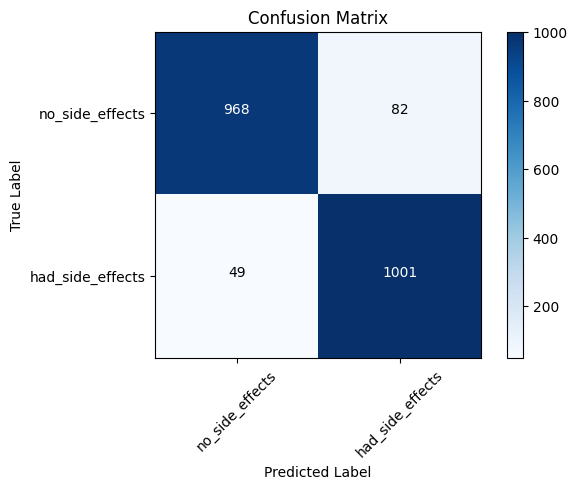

In [26]:
cm_plot_labels = ["no_side_effects","had_side_effects"]
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title="Confusion Matrix")

# Save and load Model

## 1. Save model

In [27]:
# Check first to see if file already exists
# If not , the model is saved to disk
import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save('models/medical_trial_model.h5')

This save function saves"
* The architecture of the model, allowing to re-create the model.
* The weights of the model.
* The training configuration (loss, optimizer)
* The state of the optimizer, allowing to resume training exactly where you left off

In [28]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

In [29]:
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 644 (2.52 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [30]:
new_model.get_weights()

[array([[ 0.36199784,  0.03142443, -0.42778414, -0.4202662 , -0.31893897,
          0.5358011 ,  0.5850202 , -0.47770026,  0.5512389 ,  0.044521  ,
         -0.32504544, -0.0301038 , -0.15462697,  0.66505903, -0.09844655,
         -0.54264015]], dtype=float32),
 array([ 0.15428531,  0.2025062 ,  0.        ,  0.        ,  0.        ,
        -0.13154   , -0.13602747,  0.        , -0.12083916,  0.19996293,
         0.        ,  0.        ,  0.1901896 , -0.13147755,  0.        ,
         0.        ], dtype=float32),
 array([[ 2.80077487e-01, -3.08389366e-01, -2.05665141e-01,
          1.43067986e-01, -1.40843049e-01, -6.40740246e-02,
          8.80604684e-02,  2.04169646e-01, -1.55794784e-01,
         -1.28591135e-01, -2.99215883e-01, -1.13881692e-01,
          4.99396548e-02,  1.16011091e-01,  3.22030663e-01,
          3.37000191e-02,  1.00372016e-01,  2.46459141e-01,
          6.61607981e-02, -3.21439505e-01, -2.64688432e-01,
          2.99459815e-01,  1.76471591e-01,  8.04385468e-02,
 

In [31]:
new_model.optimizer

## 2. model.to_json()

Only saves the architecture of the model

In [32]:
# save as JSON
json_string = model.to_json()

# save as YAML
# yaml string = mmodel.to_yaml()

In [33]:
json_string

'{"module": "keras", "class_name": "Sequential", "config": {"name": "sequential", "trainable": true, "dtype": "float32", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 1], "dtype": "float32", "sparse": false, "name": "input_layer"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "registered_name": null, "build_config": {"input_shape": [null, 1]}}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense_1", "trainab

In [34]:
# model reconstruction from JSON:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

# model reconstruction from YAML:
# from tensorflow.keras.models import model_from_yaml
# model_architecture = model_from_yaml(yaml_string)

In [35]:
model_architecture.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,286 (5.03 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 644 (2.52 KB)

## 3. Save weights

Only saves weights

In [36]:
# Check first to see if file already exists
# If not , the model is saved to disk
import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save_weights('models/medical_trial_model.h5')

In [37]:
model2 = Sequential([
    Input(shape=(1,)),
    Dense(units=16, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [38]:
model2.load_weights('models/medical_trial_model.h5')

In [39]:
model2.get_weights()

[array([[ 0.36199784,  0.03142443, -0.42778414, -0.4202662 , -0.31893897,
          0.5358011 ,  0.5850202 , -0.47770026,  0.5512389 ,  0.044521  ,
         -0.32504544, -0.0301038 , -0.15462697,  0.66505903, -0.09844655,
         -0.54264015]], dtype=float32),
 array([ 0.15428531,  0.2025062 ,  0.        ,  0.        ,  0.        ,
        -0.13154   , -0.13602747,  0.        , -0.12083916,  0.19996293,
         0.        ,  0.        ,  0.1901896 , -0.13147755,  0.        ,
         0.        ], dtype=float32),
 array([[ 2.80077487e-01, -3.08389366e-01, -2.05665141e-01,
          1.43067986e-01, -1.40843049e-01, -6.40740246e-02,
          8.80604684e-02,  2.04169646e-01, -1.55794784e-01,
         -1.28591135e-01, -2.99215883e-01, -1.13881692e-01,
          4.99396548e-02,  1.16011091e-01,  3.22030663e-01,
          3.37000191e-02,  1.00372016e-01,  2.46459141e-01,
          6.61607981e-02, -3.21439505e-01, -2.64688432e-01,
          2.99459815e-01,  1.76471591e-01,  8.04385468e-02,
 

# Convolutional Neural Network

In [1]:
from zipfile import ZipFile

with ZipFile('D:\Python\MLProjectsPW\keras_tf\dogs-vs-cats.zip', 'r') as zip_file:
    zip_file.extractall('Dogs-vs-Cats/data')

In [2]:
!del Dogs-vs-Cats\\data\\test1.zip
!del Dogs-vs-Cats\\data\\sampleSubmission.csv

In [3]:
with ZipFile('Dogs-vs-Cats\\data\\train.zip', 'r') as zip_file:
    zip_file.extractall('Dogs-vs-Cats\\data\\')

In [4]:
!del Dogs-vs-Cats\\data\\train.zip

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation , Dense , Conv2D , MaxPooling2D , Flatten , Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
%matplotlib inline

In [6]:
physical_devices = tf.config.experimental.list_physical_devices("GPU")
print("Num GPUs Available: ", len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


# Data Preparation

The images included in the data/cats-and-dogs directory are random subset of the full cat and dog dataset from the following Kaggle competition: https://www.kaggle.com/c/dogs-vs-cats/data

In [7]:
# Organize data into train , valid, test dirs 
os.chdir('Dogs-vs-Cats')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog', exist_ok=True)
    os.makedirs('train/cat', exist_ok=True)
    os.makedirs('valid/dog', exist_ok=True)
    os.makedirs('valid/cat', exist_ok=True)
    os.makedirs('test/dog', exist_ok=True)
    os.makedirs('test/cat', exist_ok=True)
    
    for c in random.sample(glob.glob('data/train/cat*'), 500):
        shutil.move(c, 'train/cat')
    for c in random.sample(glob.glob('data/train/dog*'), 500):
        shutil.move(c, 'train/dog')
    for c in random.sample(glob.glob('data/train/cat*'), 100):
        shutil.move(c, 'valid/cat')
    for c in random.sample(glob.glob('data/train/dog*'), 100):
        shutil.move(c, 'valid/dog')
    for c in random.sample(glob.glob('data/train/cat*'), 50):
        shutil.move(c, 'test/cat')
    for c in random.sample(glob.glob('data/train/dog*'), 50):
        shutil.move(c, 'test/dog')
    shutil.rmtree('data')
os.chdir('../')  

In [8]:
train_path = 'Dogs-vs-Cats\\train'
valid_path = 'Dogs-vs-Cats\\valid'
test_path = 'Dogs-vs-Cats\\test'

In [9]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory = train_path, target_size=(224,224), classes = ['cat','dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory = valid_path, target_size=(224, 224), classes = ['cat','dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory = test_path, target_size=(224, 224), classes = ['cat','dog'], batch_size=10, shuffle = False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [10]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [11]:
imgs , labels = next(train_batches)

In [12]:
# Function to plot image in the form of a grid with 1 row and 10 columns where the images are placed

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

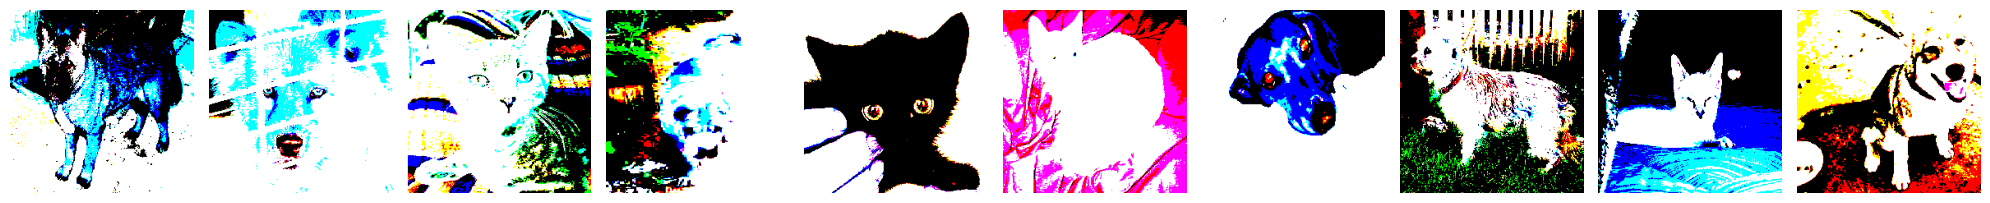

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [13]:
plotImages(imgs)
print(labels)

# Build and train a CNN

In [14]:
model = Sequential([
    Input(shape=(224,224,3)),
    Conv2D(filters=32, kernel_size= (3,3) , activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size= (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
    ])

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │         401,410 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 420,802 (1.61 MB)

 Trainable params: 420,802 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
model.fit(x=train_batches , validation_data=valid_batches , epochs=10, verbose=2)

Epoch 1/10


D:\Python\MLProjectsPW\keras_tf\env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 - 14s - 143ms/step - accuracy: 0.5790 - loss: 16.5872 - val_accuracy: 0.5950 - val_loss: 5.2961
Epoch 2/10
100/100 - 11s - 113ms/step - accuracy: 0.7530 - loss: 2.2940 - val_accuracy: 0.6350 - val_loss: 3.1663
Epoch 3/10
100/100 - 11s - 113ms/step - accuracy: 0.8950 - loss: 0.5829 - val_accuracy: 0.6000 - val_loss: 2.8972
Epoch 4/10
100/100 - 11s - 112ms/step - accuracy: 0.9560 - loss: 0.1302 - val_accuracy: 0.6250 - val_loss: 2.5310
Epoch 5/10
100/100 - 20s - 201ms/step - accuracy: 0.9860 - loss: 0.0474 - val_accuracy: 0.6550 - val_loss: 2.3200
Epoch 6/10
100/100 - 22s - 223ms/step - accuracy: 0.9980 - loss: 0.0052 - val_accuracy: 0.6300 - val_loss: 2.3209
Epoch 7/10
100/100 - 22s - 223ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.6400 - val_loss: 2.3328
Epoch 8/10
100/100 - 40s - 396ms/step - accuracy: 1.0000 - loss: 7.1298e-04 - val_accuracy: 0.6400 - val_loss: 2.3290
Epoch 9/10
100/100 - 22s - 215ms/step - accuracy: 1.0000 - loss: 6.0175e-04 - val_accuracy: 0.

# Predict

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

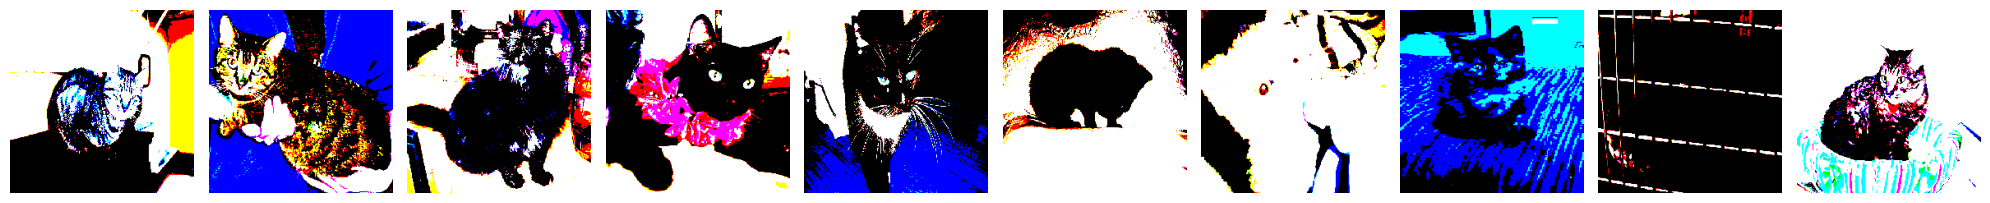

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [18]:
test_imgs , test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [19]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [20]:
predictions = model.predict(x=test_batches , verbose=0)

In [21]:
np.round(predictions)

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [22]:
cm = confusion_matrix(y_true=test_batches.classes , y_pred=np.argmax(predictions,axis=1))

In [23]:
def plot_confusion_matrix(cm, classes,
                         normalize= False,
                         title="Confusion Matrix",
                         cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normaliza=True'.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    tresh = cm.max()/2.
    for i , j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment='center',
                color="white" if cm[i,j] > tresh else "black")
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    

In [24]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[28 22]
 [16 34]]


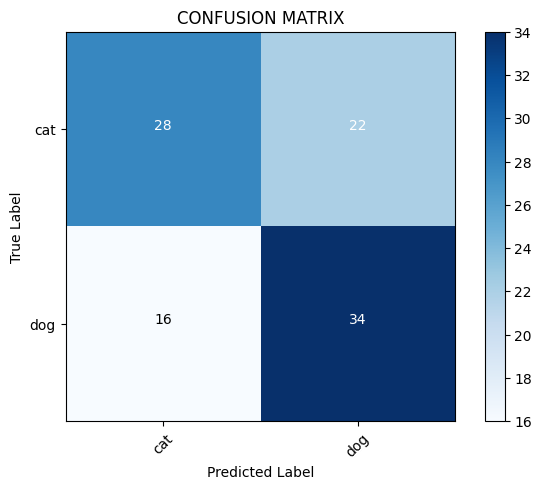

In [25]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='CONFUSION MATRIX')

# Build Fine Tuned VGG16 model

In [26]:
# Download the model - Internet required
vgg16_model = tf.keras.applications.vgg16.VGG16()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 97s 0us/step


In [27]:
vgg16_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
def count_params(model):
    non_trainable_params = np.sum([np.prod(v.shape.as_list()) for v in model.non_trainable_weights])
    trainable_params = np.sum([np.prod(v.shape.as_list()) for v in model.trainable_weights])
    return {'non_trainable_params':non_trainable_params, 'trainable_params':trainable_params}

In [45]:
params = count_params(vgg16_model)
assert params['non_trainable_params'] == 0 
assert params['trainable_params'] == 138357544

In [46]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [47]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc2 (Dense)                          │ (None, 4096)                │      16,781,312 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
params = count_params(vgg16_model)
assert params['non_trainable_params'] == 0 
assert params['trainable_params'] == 138357544

In [49]:
for layer in model.layers:
    layer.trainable = False

In [50]:
model.add(Dense(units=2, activation='softmax'))

In [51]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc2 (Dense)                          │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,268,738 (512.19 MB)

 Trainable params: 8,194 (32.01 KB)

 Non-trainable params: 134,260,544 (512.16 MB)

In [55]:
params = count_params(model)
assert params['non_trainable_params'] == 134260544
assert params['trainable_params'] == 8194

# Train the fine-tuned VGG16 model

In [56]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
model.fit(x=train_batches,validation_data=valid_batches,epochs=5,verbose=2)

Epoch 1/5
100/100 - 164s - 2s/step - accuracy: 0.8300 - loss: 0.4094 - val_accuracy: 0.9250 - val_loss: 0.1631
Epoch 2/5
100/100 - 175s - 2s/step - accuracy: 0.9640 - loss: 0.1097 - val_accuracy: 0.9500 - val_loss: 0.1171
Epoch 3/5
100/100 - 170s - 2s/step - accuracy: 0.9760 - loss: 0.0705 - val_accuracy: 0.9600 - val_loss: 0.0952
Epoch 4/5
100/100 - 173s - 2s/step - accuracy: 0.9780 - loss: 0.0526 - val_accuracy: 0.9600 - val_loss: 0.0905
Epoch 5/5
100/100 - 169s - 2s/step - accuracy: 0.9890 - loss: 0.0402 - val_accuracy: 0.9600 - val_loss: 0.0835


# Predict using the fine-tuned VGG16 model

In [58]:
predictions = model.predict(x=test_batches , verbose=0)

In [59]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [60]:
cm = confusion_matrix(y_true=test_batches.classes , y_pred=np.argmax(predictions,axis=1))

In [61]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[50  0]
 [ 0 50]]


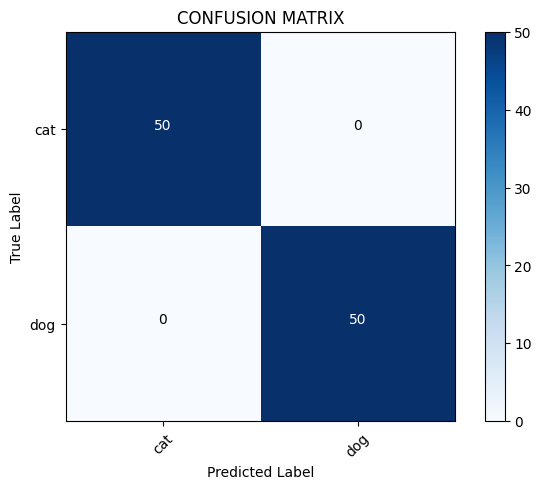

In [62]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='CONFUSION MATRIX')

In [12]:
shutil.rmtree('Dogs-vs-Cats/')